In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
data = pd.read_csv('IRIS_data.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [142]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [143]:
data['species'] = data['species'].map({'Iris-setosa':0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [144]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [145]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [146]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [148]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [149]:
Y_train

4      0
32     0
142    2
85     1
86     1
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 112, dtype: int64

In [150]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3) #post pruning
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

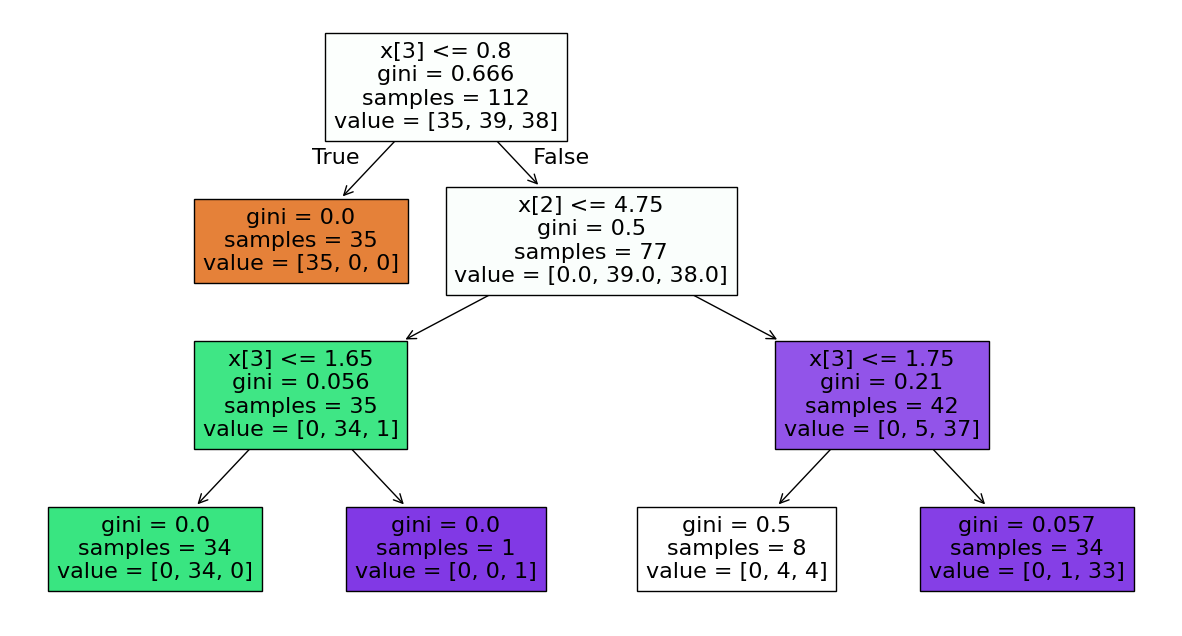

In [151]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(classifier,filled=True)



In [152]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [153]:
import pickle
pickle.dump(classifier, open('decisionTree.pkl', 'wb'))

In [154]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred,Y_test)
print(score)

1.0


In [155]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [157]:
#prepruning
parameter = {
    'criterion': ['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features': [None,'sqrt','log2']
}

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier2 = DecisionTreeClassifier()
cv = GridSearchCV(classifier2,param_grid=parameter,cv=5,scoring='accuracy', error_score='raise')
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [159]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'splitter': 'random'}

In [160]:
y_pred2 = cv.predict(X_test)
y_pred2

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [161]:
from sklearn.metrics import accuracy_score, classification_report
score2 = accuracy_score(y_pred2,Y_test)
print(score2)

1.0


In [162]:
print(classification_report(y_pred2, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

